# Example usage of PCA modeling functions

## Example plot models

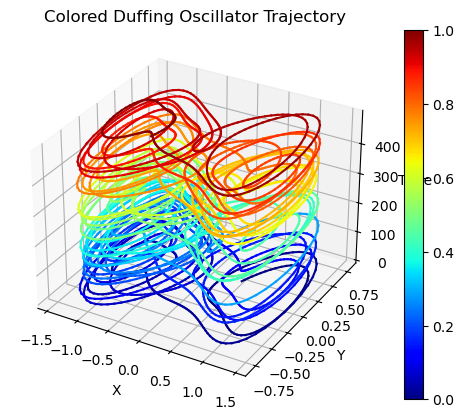

In [1]:
import pca_model_functions # make sure this functions file is saved in same location as code to make life easier for you
pca_model_functions.duffing_oscillation_test()

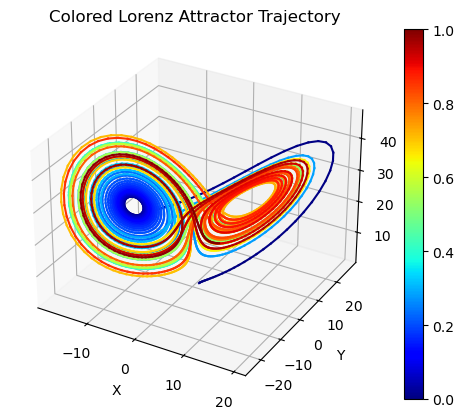

In [2]:
pca_model_functions.lorenz_attractor_test()

## Load PCA data

In [8]:
from sklearn.decomposition import PCA
import numpy as np
# Assuming your data is in a variable called 'data'
data = np.random.rand(1000, 5)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

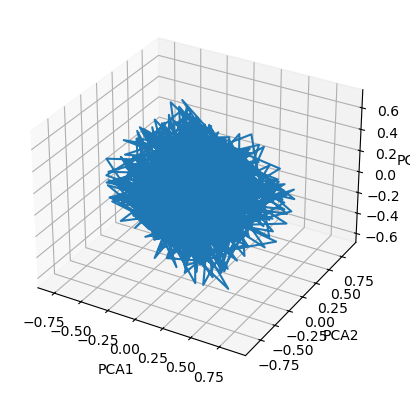

In [10]:
# Plot the PCA data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

#### notice how  messy this data is, and how the attractors below still look pretty good. 

## Duffing Oscillator Fit

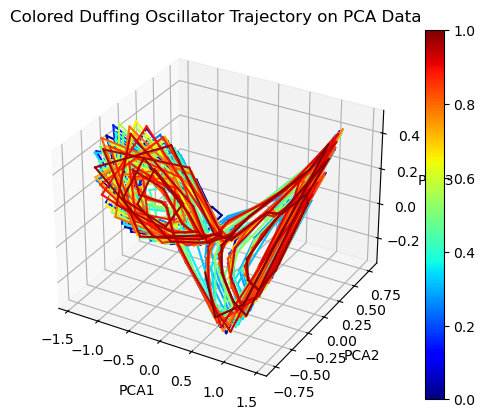

In [4]:
# Assuming 'pca_data' is your 3D PCA dataset
pca_model_functions.duffing_oscillation_pca(pca_data)

## Lorenz Fit

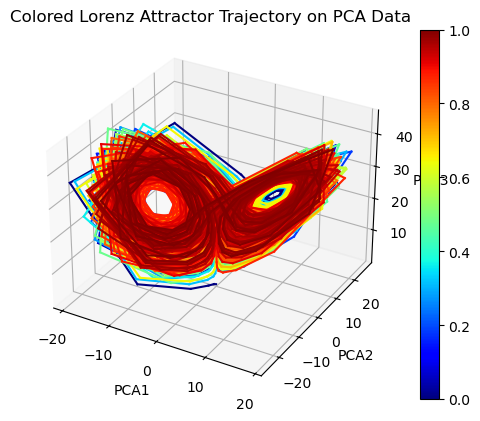

In [5]:
pca_model_functions.lorenz_attractor_pca(pca_data)

## Neural ODE Fit

### if you solve using the above random data, you just get back the original mess
we are using a neural ODE solver to make less assumptions about the type of system our PCA may be

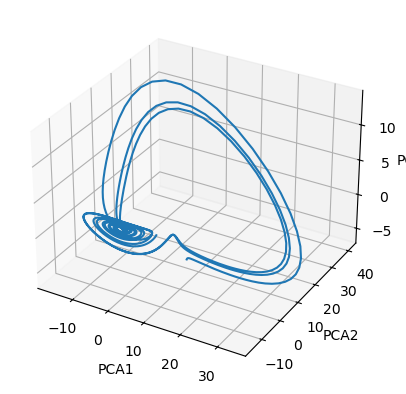

array([[ 19.69453095, -14.62963752,   2.34801795],
       [ 19.75252592, -14.61069794,   2.43264582],
       [ 19.82186654, -14.58485342,   2.49118093],
       ...,
       [  2.17697834,   1.83559526,  -1.27032645],
       [  2.5637932 ,   1.40496498,  -0.99167846],
       [  2.91787352,   0.96841634,  -0.72797345]])

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def generate_lorenz_data(num_points=1000, dt=0.01, sigma=10, beta=8/3, rho=28):
    def lorenz(x, y, z, sigma=sigma, beta=beta, rho=rho):
        x_dot = sigma * (y - x)
        y_dot = x * (rho - z) - y
        z_dot = x * y - beta * z
        return x_dot, y_dot, z_dot

    xs = np.empty(num_points + 1)
    ys = np.empty(num_points + 1)
    zs = np.empty(num_points + 1)

    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    for i in range(num_points):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    return xs, ys, zs

# Generate Lorenz attractor data
num_points = 1000
xs, ys, zs = generate_lorenz_data(num_points=num_points)

# Combine the data into a single array
data = np.vstack((xs, ys, zs)).T

# Perform PCA on the data
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# Plot the PCA data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

# Return the PCA data
pca_data

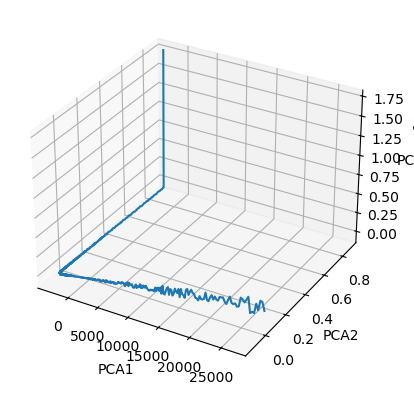

array([[-2.98916673e+03,  8.75133176e-01,  1.78469619e-11],
       [-2.98915259e+03,  8.65133294e-01, -3.45557087e-13],
       [-2.98913830e+03,  8.55233413e-01, -3.18695311e-13],
       ...,
       [ 2.60661019e+04,  1.17900031e-01,  6.59156761e-13],
       [ 2.63566687e+04,  1.20326937e-01,  5.03631499e-13],
       [ 2.66501412e+04,  1.22778120e-01, -5.86704585e-13]])

In [2]:
# saddle
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def generate_saddle_data(num_points=1000, dt=0.01, a=1, b=1, c=1):
    def saddle(x, y, z, a=a, b=b, c=c):
        x_dot = a * x
        y_dot = -b * y
        z_dot = c * z
        return x_dot, y_dot, z_dot

    xs = np.empty(num_points + 1)
    ys = np.empty(num_points + 1)
    zs = np.empty(num_points + 1)

    xs[0], ys[0], zs[0] = (1., 1., 1.)

    for i in range(num_points):
        x_dot, y_dot, z_dot = saddle(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    return xs, ys, zs

# Generate saddle data
num_points = 1000
xs, ys, zs = generate_saddle_data(num_points=num_points)

# Combine the data into a single array
data = np.vstack((xs, ys, zs)).T

# Perform PCA on the data
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# Plot the PCA data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

# Return the PCA data
pca_data

Epoch 0, Loss: 276.1731872558594
Epoch 100, Loss: 97.21531677246094
Epoch 200, Loss: 82.22079467773438
Epoch 300, Loss: 77.00947570800781
Epoch 400, Loss: 74.28134155273438
Epoch 500, Loss: 70.43213653564453
Epoch 600, Loss: 68.75493621826172
Epoch 700, Loss: 67.56389617919922
Epoch 800, Loss: 66.73345184326172
Epoch 900, Loss: 66.16070556640625


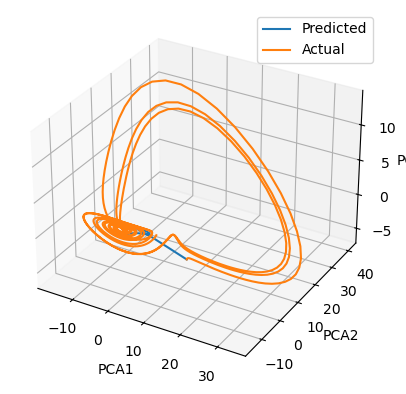

In [7]:
pca_model_functions.neural_ode_pca(pca_data)

Epoch 0, Loss: 275.7235412597656
Epoch 100, Loss: 97.19441986083984
Epoch 200, Loss: 82.34937286376953
Epoch 300, Loss: 77.1080322265625
Epoch 400, Loss: 73.82604217529297
Epoch 500, Loss: 69.87931060791016
Epoch 600, Loss: 69.12733459472656
Epoch 700, Loss: 68.24662780761719
Epoch 800, Loss: 67.51524353027344
Epoch 900, Loss: 66.87142944335938


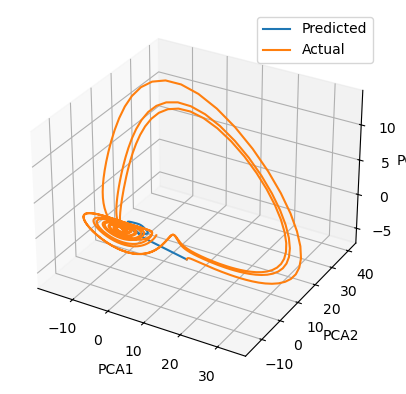

In [4]:
# Example usage with lorenz dummy PCA data

ode_func = pca_model_functions.neural_ode_pca(pca_data)

In [5]:
# Generate the vector field
X, Y, Z, U, V, W = pca_model_functions.generate_vector_field(ode_func)

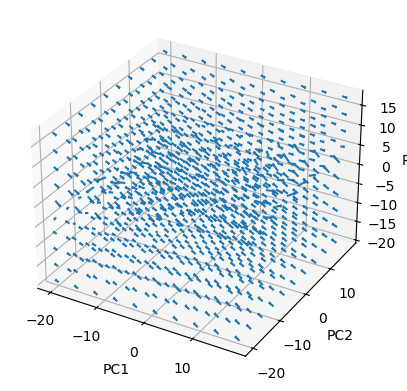

In [6]:
# Plot the vector field with reduced density and adjusted length for better visibility
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X[::2, ::2, ::2], Y[::2, ::2, ::2], Z[::2, ::2, ::2],
          U[::2, ::2, ::2], V[::2, ::2, ::2], W[::2, ::2, ::2],
          length=1.9, normalize=True)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [16]:
# Function to compute the trajectory
import torch
def compute_trajectory(start_point, steps=100, step_size=0.1):
    point = start_point
    trajectory = [point]
    for _ in range(steps):
        point_tensor = torch.tensor(point, dtype=torch.float32)
        vector = ode_func(0, point_tensor).detach().numpy()
        point = point + vector * step_size
        trajectory.append(point)
    return np.array(trajectory)




<Figure size 640x480 with 0 Axes>

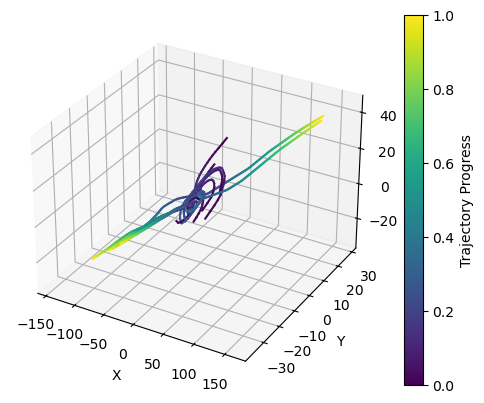

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate and plot trajectories for 10 random starting points
for _ in range(10):
    start_point = np.random.uniform(-20, 20, 3)
    trajectory = compute_trajectory(start_point)
    
    # Extract x, y, z coordinates
    x = trajectory[:, 0]
    y = trajectory[:, 1]
    z = trajectory[:, 2]

    # Create a colormap
    colors = np.linspace(0, 1, len(x))

    # Plot the trajectory with a colormap gradient
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.viridis(colors[i]))

# Add labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Trajectory Progress') # start is 0, end is 1 on colorbar

plt.show()

In [18]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Create a colormap
norm = Normalize(vmin=0, vmax=len(trajectory))
cmap = plt.get_cmap('coolwarm')

# Plot the trajectory with color mapping
for i in range(len(trajectory) - 1):
    ax.plot(trajectory[i:i+2, 0], trajectory[i:i+2, 1], trajectory[i:i+2, 2], color=cmap(norm(i)))

# Add a colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Step')


<Figure size 640x480 with 0 Axes>

In [7]:
# Example usage with initial guesses
initial_guesses = [[0., 0., 0.], [10., 10., 10.], [-10., -10., -10.]]
fixed_points = pca_model_functions.find_fixed_points(ode_func, initial_guesses)

c:\Users\admin\Desktop\pca_model_functions.py:253: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  fixed_points = [fsolve(equations, guess) for guess in initial_guesses]


In [8]:
# Check stability of fixed points
stability = pca_model_functions.check_stability(ode_func, fixed_points)
fixed_points_stability = list(zip(fixed_points, stability))

fixed_points_stability

[(array([ 0.91561395, -1.62115103,  0.61124212]),
  ('Unstable',
   array([-1.2719432+38.15637j, -1.2719432-38.15637j,  3.2033446 +0.j     ],
         dtype=complex64))),
 (array([ 0.91561422, -1.62115105,  0.61124216]),
  ('Unstable',
   array([-1.271944+38.15637j, -1.271944-38.15637j,  3.20335  +0.j     ],
         dtype=complex64))),
 (array([2333.75168579,  705.00721633,  403.42717423]),
  ('Stable',
   array([-3.6069007e-08+0.0000000e+00j, -2.0604383e-15+1.9153683e-15j,
          -2.0604383e-15-1.9153683e-15j], dtype=complex64)))]